# ANN_with_keras

In [7]:
# Common imports
import numpy as np
import os
import pandas as pd

In [2]:
# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [3]:
# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

update  ==  conda install -c conda-forge tensorflow=2.1.0

First let's import TensorFlow and Keras.

In [4]:
import tensorflow as tf
from tensorflow import keras

In [5]:
conda install -c conda-forge tensorflow=2.1.0

Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Maryem_Ou\Anaconda3

  added / updated specs:
    - tensorflow=2.1.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _tflow_select-2.3.0        |              mkl           3 KB
    absl-py-0.10.0             |   py37hc8dfbb8_1         169 KB  conda-forge
    aiohttp-3.7.3              |   py37hcc03f2d_0         577 KB  conda-forge
    astor-0.8.1                |     pyh9f0ad1d_0          25 KB  conda-forge
    async-timeout-3.0.1        |          py_1000          11 KB  conda-forge
    blinker-1.4                |             py_1          13 KB  conda-forge
    cachetools-

tensorboard-2.4.0    | 8.8 MB    | #8         |  19% 
tensorboard-2.4.0    | 8.8 MB    | #9         |  19% 
tensorboard-2.4.0    | 8.8 MB    | ##1        |  22% 
tensorboard-2.4.0    | 8.8 MB    | ##2        |  22% 
tensorboard-2.4.0    | 8.8 MB    | ##3        |  23% 
tensorboard-2.4.0    | 8.8 MB    | ##4        |  25% 
tensorboard-2.4.0    | 8.8 MB    | ##5        |  25% 
tensorboard-2.4.0    | 8.8 MB    | ##5        |  25% 
tensorboard-2.4.0    | 8.8 MB    | ##5        |  26% 
tensorboard-2.4.0    | 8.8 MB    | ##6        |  26% 
tensorboard-2.4.0    | 8.8 MB    | ##6        |  27% 
tensorboard-2.4.0    | 8.8 MB    | ##7        |  28% 
tensorboard-2.4.0    | 8.8 MB    | ##8        |  28% 
tensorboard-2.4.0    | 8.8 MB    | ##8        |  29% 
tensorboard-2.4.0    | 8.8 MB    | ##9        |  29% 
tensorboard-2.4.0    | 8.8 MB    | ##9        |  30% 
tensorboard-2.4.0    | 8.8 MB    | ###        |  31% 
tensorboard-2.4.0    | 8.8 MB    | ###1       |  31% 
tensorboard-2.4.0    | 8.8 M

libmklml-2019.0.5    | 17.5 MB   | #######3   |  73% 
libmklml-2019.0.5    | 17.5 MB   | #######3   |  74% 
libmklml-2019.0.5    | 17.5 MB   | #######3   |  74% 
libmklml-2019.0.5    | 17.5 MB   | #######4   |  74% 
libmklml-2019.0.5    | 17.5 MB   | #######4   |  74% 
libmklml-2019.0.5    | 17.5 MB   | #######4   |  74% 
libmklml-2019.0.5    | 17.5 MB   | #######4   |  75% 
libmklml-2019.0.5    | 17.5 MB   | #######4   |  75% 
libmklml-2019.0.5    | 17.5 MB   | #######5   |  75% 
libmklml-2019.0.5    | 17.5 MB   | #######5   |  75% 
libmklml-2019.0.5    | 17.5 MB   | #######5   |  76% 
libmklml-2019.0.5    | 17.5 MB   | #######6   |  76% 
libmklml-2019.0.5    | 17.5 MB   | #######6   |  76% 
libmklml-2019.0.5    | 17.5 MB   | #######6   |  77% 
libmklml-2019.0.5    | 17.5 MB   | #######6   |  77% 
libmklml-2019.0.5    | 17.5 MB   | #######6   |  77% 
libmklml-2019.0.5    | 17.5 MB   | #######7   |  77% 
libmklml-2019.0.5    | 17.5 MB   | #######7   |  77% 
libmklml-2019.0.5    | 17.5 

Let's start by loading the fashion MNIST dataset. Keras has a number of functions to load popular datasets in keras.datasets. The dataset is already split for you between a training set and a test set, but it can be useful to split the training set further to have a validation set:

In [52]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

AttributeError: 'tuple' object has no attribute 'load_data'

The training set contains 60,000 grayscale images, each 28x28 pixels and Each pixel intensity is represented as a byte (0 to 255)::

In [6]:
X_train_full.shape

(60000, 28, 28)

Let's split the full training set into a validation set and a (smaller) training set.
We also scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255.

In [9]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

The validation set contains 5,000 images, and the test set contains 10,000 images:

In [14]:
X_valid.shape

(5000, 28, 28)

You can plot an image using Matplotlib's imshow() function, with a 'binary' color map:

train 

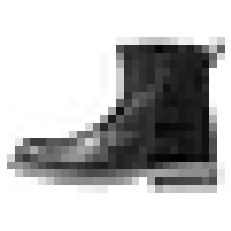

In [10]:
plt.imshow(X_train[3], cmap="binary")
plt.axis('off')
plt.show()

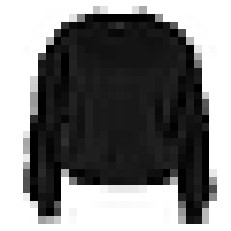

In [11]:
plt.imshow(X_valid[0], cmap="binary")
plt.axis('off')
plt.show()

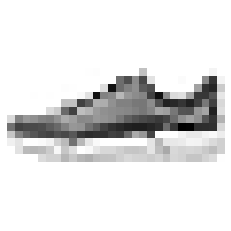

In [12]:
plt.imshow(X_test[0], cmap="binary")
plt.axis('off')
plt.show()

So the first image in the training set is a coat:

Let's take a look at a sample of the images in the dataset:

Construct a Model

In [5]:
from IPython.display import Image 

In [18]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [20]:
keras.backend.clear_session()
np.random.seed(42)

In [21]:
model.layers

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [31]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [32]:
model.get_layer(hidden1.name) is hidden1

True

In [33]:
weights, biases = hidden1.get_weights()

In [34]:
weights

array([[ 0.05438234, -0.01599628,  0.01407108, ..., -0.04964975,
         0.02486498, -0.05469664],
       [-0.02347546,  0.0269959 , -0.02179676, ..., -0.02931186,
        -0.00611173, -0.06853696],
       [-0.06082596, -0.0376939 ,  0.0084466 , ..., -0.04477396,
         0.03300586,  0.04948632],
       ...,
       [ 0.04973996, -0.01196851,  0.06884174, ...,  0.03407669,
         0.04859086, -0.01059177],
       [-0.0650009 , -0.00078192,  0.00804892, ...,  0.01565319,
        -0.06714483,  0.05883615],
       [-0.05317071, -0.06850863, -0.04663314, ...,  0.04215351,
         0.02137179,  0.00019274]], dtype=float32)

In [35]:
weights.shape

(784, 300)

In [36]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [37]:
biases.shape

(300,)

Here you can chose the loss function, the optimizer, the performance metric, etc. 

In [23]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

Here you can chose how many epochs you need and the batch size.

In [39]:
history = model.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.7141 - accuracy: 0.7648 - val_loss: 0.5409 - val_accuracy: 0.8080
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4873 - accuracy: 0.8300 - val_loss: 0.4711 - val_accuracy: 0.8288
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4415 - accuracy: 0.8447 - val_loss: 0.4221 - val_accuracy: 0.8518
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4158 - accuracy: 0.8534 - val_loss: 0.3897 - val_accuracy: 0.8662
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3964 - accuracy: 0.8604 - val_loss: 0.4410 - val_accuracy: 0.8434
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3814 - accuracy: 0.8661 - val_loss: 0.3728 - val_accuracy: 0.8714
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3672 - accuracy: 0.8699 - val_loss: 0.3726 - val_accuracy:

In [40]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [42]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

# Plot learning Curves

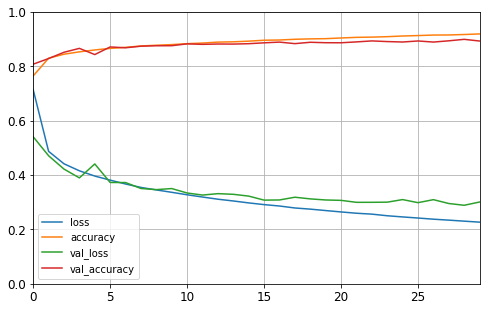

In [43]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [44]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3363 - accuracy: 0.8814


[0.336343377828598, 0.8813999891281128]

# The EXERCICE

# 1) Plot Learning curves when using different optimizers



1-optimizers:Adam

In [24]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="Adam",
              metrics=["accuracy"])

In [25]:
history1 = model.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 29s 525us/sample - loss: 0.4847 - accuracy: 0.8246 - val_loss: 0.3827 - val_accuracy: 0.8606
Epoch 2/30
55000/55000 [==============================] - 24s 429us/sample - loss: 0.3642 - accuracy: 0.8672 - val_loss: 0.3294 - val_accuracy: 0.8842
Epoch 3/30
55000/55000 [==============================] - 23s 414us/sample - loss: 0.3304 - accuracy: 0.8776 - val_loss: 0.3076 - val_accuracy: 0.8906
Epoch 4/30
55000/55000 [==============================] - 24s 433us/sample - loss: 0.3039 - accuracy: 0.8861 - val_loss: 0.3288 - val_accuracy: 0.8820
Epoch 5/30
55000/55000 [==============================] - 24s 443us/sample - loss: 0.2843 - accuracy: 0.8928 - val_loss: 0.3538 - val_accuracy: 0.8696
Epoch 6/30
55000/55000 [==============================] - 23s 419us/sample - loss: 0.2706 - accuracy: 0.8992 - val_loss: 0.3244 - val_accuracy: 0.8834
Epoch 7/30
55000/55000 [=====================

In [26]:
history1.params

{'batch_size': 32,
 'epochs': 30,
 'steps': 1719,
 'samples': 55000,
 'verbose': 0,
 'do_validation': True,
 'metrics': ['loss', 'accuracy', 'val_loss', 'val_accuracy']}

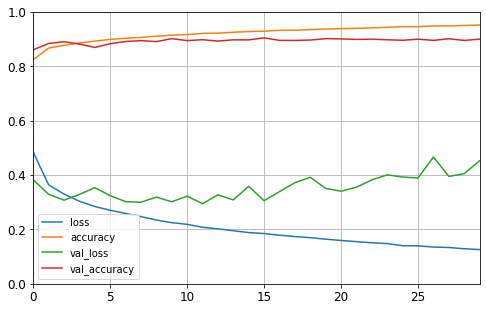

In [28]:
import pandas as pd
pd.DataFrame(history1.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

2-optimizers:RMSprop

In [31]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="RMSprop",
              metrics=["accuracy"])


In [32]:
history2 = model.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 28s 514us/sample - loss: 0.1230 - accuracy: 0.9531 - val_loss: 0.5346 - val_accuracy: 0.9008
Epoch 2/30
55000/55000 [==============================] - 25s 449us/sample - loss: 0.1321 - accuracy: 0.9517 - val_loss: 0.6031 - val_accuracy: 0.8974
Epoch 3/30
55000/55000 [==============================] - 26s 476us/sample - loss: 0.1382 - accuracy: 0.9510 - val_loss: 0.6744 - val_accuracy: 0.8924
Epoch 4/30
55000/55000 [==============================] - 24s 431us/sample - loss: 0.1472 - accuracy: 0.9484 - val_loss: 0.6488 - val_accuracy: 0.8946
Epoch 5/30
55000/55000 [==============================] - 24s 431us/sample - loss: 0.1584 - accuracy: 0.9457 - val_loss: 0.7608 - val_accuracy: 0.8926
Epoch 6/30
55000/55000 [==============================] - 25s 449us/sample - loss: 0.1648 - accuracy: 0.9447 - val_loss: 0.7163 - val_accuracy: 0.8944
Epoch 7/30
55000/55000 [=====================

In [33]:
history2.params

{'batch_size': 32,
 'epochs': 30,
 'steps': 1719,
 'samples': 55000,
 'verbose': 0,
 'do_validation': True,
 'metrics': ['loss', 'accuracy', 'val_loss', 'val_accuracy']}

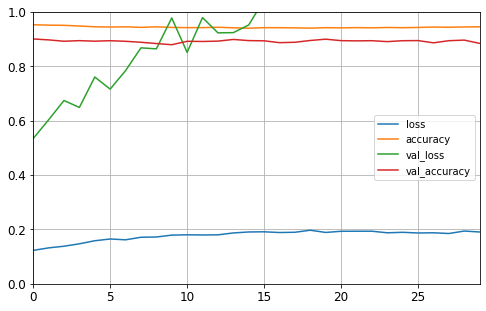

In [41]:
pd.DataFrame(history2.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [38]:
3-optimizers:Nadam

SyntaxError: illegal target for annotation (<ipython-input-38-6bdfe893ed42>, line 1)

In [36]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="Nadam",
              metrics=["accuracy"])

In [37]:
history3 = model.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 33s 597us/sample - loss: 0.2370 - accuracy: 0.9343 - val_loss: 0.8620 - val_accuracy: 0.8902
Epoch 2/30
55000/55000 [==============================] - 30s 550us/sample - loss: 0.2095 - accuracy: 0.9370 - val_loss: 0.7497 - val_accuracy: 0.8910
Epoch 3/30
55000/55000 [==============================] - 30s 547us/sample - loss: 0.1858 - accuracy: 0.9406 - val_loss: 0.8558 - val_accuracy: 0.8920
Epoch 4/30
55000/55000 [==============================] - 31s 560us/sample - loss: 0.1724 - accuracy: 0.9426 - val_loss: 0.8118 - val_accuracy: 0.8964
Epoch 5/30
55000/55000 [==============================] - 31s 564us/sample - loss: 0.1688 - accuracy: 0.9431 - val_loss: 0.7574 - val_accuracy: 0.8886
Epoch 6/30
55000/55000 [==============================] - 31s 570us/sample - loss: 0.1630 - accuracy: 0.9447 - val_loss: 0.7049 - val_accuracy: 0.8942
Epoch 7/30
55000/55000 [=====================

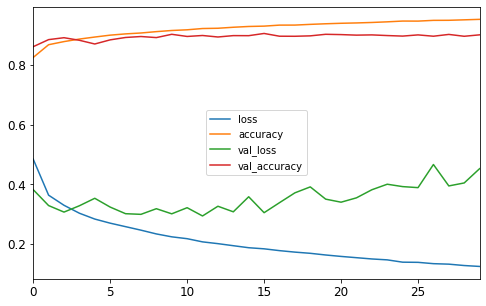

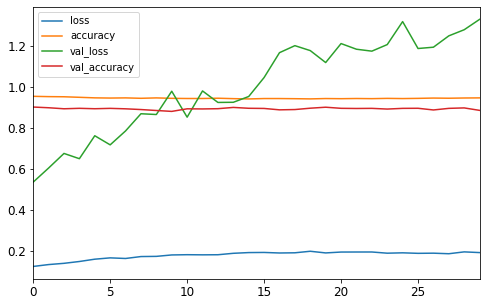

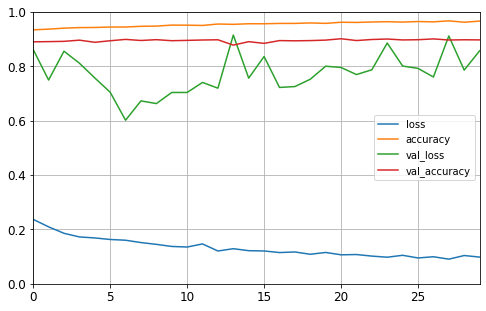

In [39]:
pd.DataFrame(history1.history).plot(figsize=(8, 5))
pd.DataFrame(history2.history).plot(figsize=(8, 5))
pd.DataFrame(history3.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

2) Plot Learning curves when using different batch size

1-size = 20

In [43]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [44]:
history4 = model.fit(X_train, y_train, batch_size=20, epochs=30,
                    validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 32s 584us/sample - loss: 0.0688 - accuracy: 0.9755 - val_loss: 0.8896 - val_accuracy: 0.9034
Epoch 2/30
55000/55000 [==============================] - 26s 478us/sample - loss: 0.0600 - accuracy: 0.9784 - val_loss: 0.9047 - val_accuracy: 0.9020
Epoch 3/30
55000/55000 [==============================] - 30s 549us/sample - loss: 0.0561 - accuracy: 0.9788 - val_loss: 0.9136 - val_accuracy: 0.9034
Epoch 4/30
55000/55000 [==============================] - 27s 500us/sample - loss: 0.0553 - accuracy: 0.9793 - val_loss: 0.9377 - val_accuracy: 0.9040
Epoch 5/30
55000/55000 [==============================] - 35s 633us/sample - loss: 0.0539 - accuracy: 0.9798 - val_loss: 0.9572 - val_accuracy: 0.8988
Epoch 6/30
55000/55000 [==============================] - 32s 577us/sample - loss: 0.0528 - accuracy: 0.9804 - val_loss: 0.9715 - val_accuracy: 0.9006
Epoch 7/30
55000/55000 [=====================

2- size = 40

In [45]:
history5 = model.fit(X_train, y_train, batch_size=40, epochs=30,
                    validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 17s 315us/sample - loss: 0.0360 - accuracy: 0.9867 - val_loss: 1.1448 - val_accuracy: 0.9026
Epoch 2/30
55000/55000 [==============================] - 17s 312us/sample - loss: 0.0359 - accuracy: 0.9867 - val_loss: 1.1416 - val_accuracy: 0.9054
Epoch 3/30
55000/55000 [==============================] - 16s 285us/sample - loss: 0.0355 - accuracy: 0.9869 - val_loss: 1.1478 - val_accuracy: 0.9030
Epoch 4/30
55000/55000 [==============================] - 16s 289us/sample - loss: 0.0351 - accuracy: 0.9871 - val_loss: 1.1471 - val_accuracy: 0.9032
Epoch 5/30
55000/55000 [==============================] - 16s 287us/sample - loss: 0.0350 - accuracy: 0.9875 - val_loss: 1.1637 - val_accuracy: 0.9052
Epoch 6/30
55000/55000 [==============================] - 18s 331us/sample - loss: 0.0349 - accuracy: 0.9870 - val_loss: 1.1526 - val_accuracy: 0.9046
Epoch 7/30
55000/55000 [=====================

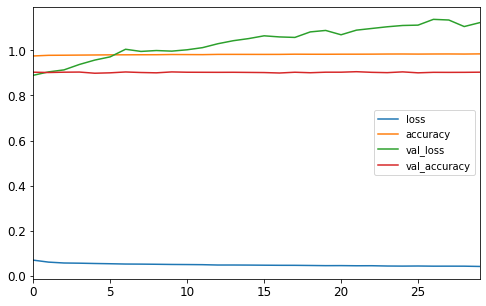

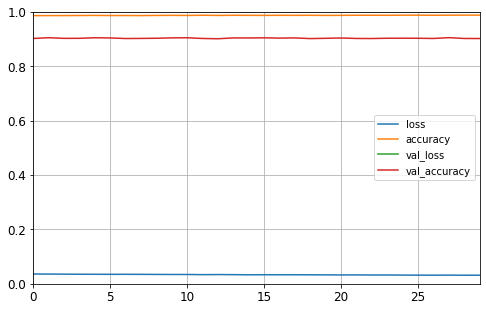

In [46]:
pd.DataFrame(history4.history).plot(figsize=(8, 5))
pd.DataFrame(history5.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

3) Plot Learning curves when using different number of epochs

1-10 epochs

In [47]:
history6 = model.fit(X_train, y_train, batch_size=32, epochs=10,
                    validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 24s 435us/sample - loss: 0.0324 - accuracy: 0.9883 - val_loss: 1.2412 - val_accuracy: 0.9024
Epoch 2/10
55000/55000 [==============================] - 23s 423us/sample - loss: 0.0325 - accuracy: 0.9877 - val_loss: 1.2271 - val_accuracy: 0.9040
Epoch 3/10
55000/55000 [==============================] - 22s 392us/sample - loss: 0.0322 - accuracy: 0.9877 - val_loss: 1.2298 - val_accuracy: 0.9042
Epoch 4/10
55000/55000 [==============================] - 19s 349us/sample - loss: 0.0319 - accuracy: 0.9882 - val_loss: 1.2512 - val_accuracy: 0.9020
Epoch 5/10
55000/55000 [==============================] - 20s 363us/sample - loss: 0.0317 - accuracy: 0.9880 - val_loss: 1.2328 - val_accuracy: 0.9040
Epoch 6/10
55000/55000 [==============================] - 18s 329us/sample - loss: 0.0320 - accuracy: 0.9885 - val_loss: 1.2415 - val_accuracy: 0.9038
Epoch 7/10
55000/55000 [=====================

2-45 epochs

In [48]:
history7 = model.fit(X_train, y_train, batch_size=32, epochs=45,
                    validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/45
55000/55000 [==============================] - 19s 351us/sample - loss: 0.0308 - accuracy: 0.9892 - val_loss: 1.2644 - val_accuracy: 0.9062
Epoch 2/45
55000/55000 [==============================] - 20s 363us/sample - loss: 0.0308 - accuracy: 0.9885 - val_loss: 1.2691 - val_accuracy: 0.9062
Epoch 3/45
55000/55000 [==============================] - 20s 365us/sample - loss: 0.0307 - accuracy: 0.9889 - val_loss: 1.2585 - val_accuracy: 0.9024
Epoch 4/45
55000/55000 [==============================] - 20s 356us/sample - loss: 0.0304 - accuracy: 0.9889 - val_loss: 1.2744 - val_accuracy: 0.9030
Epoch 5/45
55000/55000 [==============================] - 19s 353us/sample - loss: 0.0302 - accuracy: 0.9885 - val_loss: 1.2661 - val_accuracy: 0.9036
Epoch 6/45
55000/55000 [==============================] - 20s 366us/sample - loss: 0.0300 - accuracy: 0.9891 - val_loss: 1.2799 - val_accuracy: 0.9044
Epoch 7/45
55000/55000 [=====================

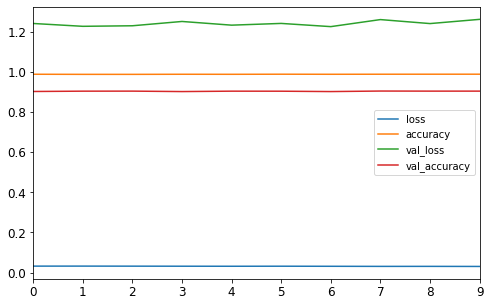

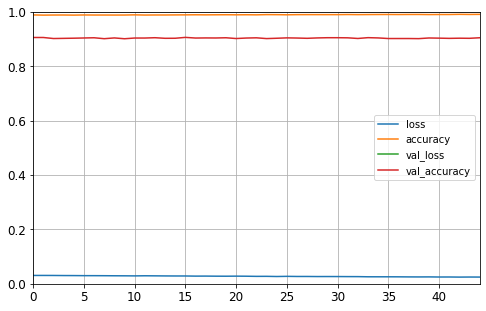

In [49]:
pd.DataFrame(history6.history).plot(figsize=(8, 5))
pd.DataFrame(history7.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

# 4) Add additional neurons and use Dropout Layer. Plot Learning curves.

In [50]:
from keras.layers import Dropout

Using TensorFlow backend.


In [51]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(500, activation="relu"))
model.add((keras.layers.Dropout(0.4)))
model.add(keras.layers.Dense(200, activation="relu"))
model.add(keras.layers.Dense(40, activation="softmax"))


In [52]:
model.layers

In [53]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 500)               392500    
_________________________________________________________________
dropout (Dropout)            (None, 500)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               100200    
_________________________________________________________________
dense_2 (Dense)              (None, 40)                8040      
Total params: 500,740
Trainable params: 500,740
Non-trainable params: 0
_________________________________________________________________


In [54]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [55]:
history8 = model.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 35s 630us/sample - loss: 0.8451 - accuracy: 0.7192 - val_loss: 0.5397 - val_accuracy: 0.8174
Epoch 2/30
55000/55000 [==============================] - 32s 581us/sample - loss: 0.5481 - accuracy: 0.8083 - val_loss: 0.4768 - val_accuracy: 0.8342
Epoch 3/30
55000/55000 [==============================] - 33s 609us/sample - loss: 0.4876 - accuracy: 0.8278 - val_loss: 0.4267 - val_accuracy: 0.8536
Epoch 4/30
55000/55000 [==============================] - 32s 584us/sample - loss: 0.4511 - accuracy: 0.8390 - val_loss: 0.4016 - val_accuracy: 0.8640
Epoch 5/30
55000/55000 [==============================] - 33s 598us/sample - loss: 0.4250 - accuracy: 0.8484 - val_loss: 0.3888 - val_accuracy: 0.8658
Epoch 6/30
55000/55000 [==============================] - 32s 589us/sample - loss: 0.4063 - accuracy: 0.8553 - val_loss: 0.3702 - val_accuracy: 0.8706
Epoch 7/30
55000/55000 [=====================

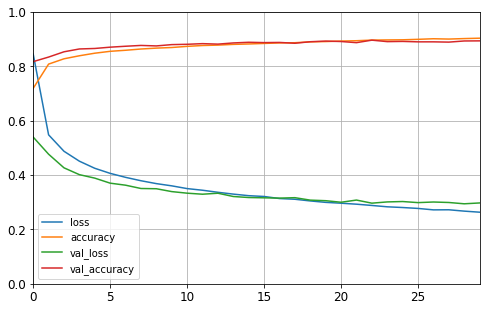

In [56]:
import pandas as pd

pd.DataFrame(history8.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

# 5) Use Batch Normalisation

In [57]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(500, activation="relu"))
model.add((keras.layers.Dropout(0.4)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(200, activation="relu"))
model.add(keras.layers.Dense(40, activation="softmax"))



In [61]:
model.layers

In [59]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [60]:
history9 = model.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 40s 720us/sample - loss: 0.6715 - accuracy: 0.7739 - val_loss: 0.4339 - val_accuracy: 0.8470
Epoch 2/30
55000/55000 [==============================] - 37s 680us/sample - loss: 0.4765 - accuracy: 0.8273 - val_loss: 0.3780 - val_accuracy: 0.8606
Epoch 3/30
55000/55000 [==============================] - 38s 687us/sample - loss: 0.4379 - accuracy: 0.8407 - val_loss: 0.3717 - val_accuracy: 0.8642
Epoch 4/30
55000/55000 [==============================] - 38s 695us/sample - loss: 0.4136 - accuracy: 0.8495 - val_loss: 0.3436 - val_accuracy: 0.8792
Epoch 5/30
55000/55000 [==============================] - 37s 667us/sample - loss: 0.3969 - accuracy: 0.8565 - val_loss: 0.3379 - val_accuracy: 0.8778- loss: 0.3975 - accuracy:  - ETA: 15s - loss: 0.3983 - accur - ETA: 14s - l - ETA: -  - ETA - ETA: 4s - loss: 0.3975 - accu - ETA: 4s - loss: 0.3974 -  - ETA: 4s - loss: 0.3970  - ETA: 3s - loss: 

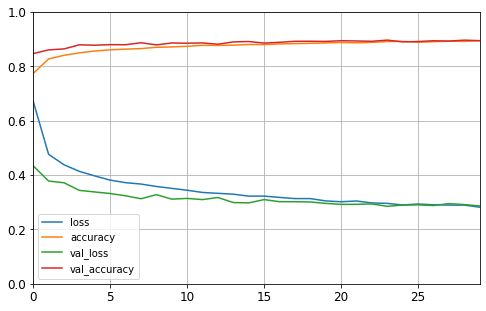

In [62]:
pd.DataFrame(history9.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

# 6) repeat with more layers

In [63]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(200, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add((keras.layers.Dropout(0.5)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(40, activation="relu"))
model.add(keras.layers.Dense(30, activation="tanh"))
model.add(keras.layers.Dense(20, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))



In [64]:
model.layers

In [65]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [66]:
history10 = model.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 25s 458us/sample - loss: 1.0257 - accuracy: 0.6458 - val_loss: 0.5422 - val_accuracy: 0.8144
Epoch 2/30
55000/55000 [==============================] - 22s 407us/sample - loss: 0.6189 - accuracy: 0.7790 - val_loss: 0.4527 - val_accuracy: 0.8370
Epoch 3/30
55000/55000 [==============================] - 22s 407us/sample - loss: 0.5431 - accuracy: 0.8096 - val_loss: 0.4164 - val_accuracy: 0.8486
Epoch 4/30
55000/55000 [==============================] - 23s 423us/sample - loss: 0.5035 - accuracy: 0.8229 - val_loss: 0.4082 - val_accuracy: 0.8518
Epoch 5/30
55000/55000 [==============================] - 23s 420us/sample - loss: 0.4861 - accuracy: 0.8280 - val_loss: 0.4008 - val_accuracy: 0.8584
Epoch 6/30
55000/55000 [==============================] - 22s 408us/sample - loss: 0.4602 - accuracy: 0.8383 - val_loss: 0.4207 - val_accuracy: 0.8464
Epoch 7/30
55000/55000 [=====================

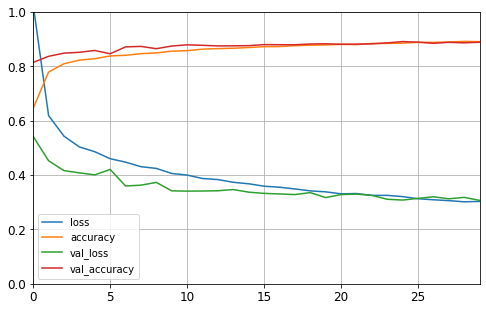

In [67]:
pd.DataFrame(history10.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

# 7) apply on different datasets

In [57]:
(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.mnist.load_data(
    path='mnist.npz'
)


11493376/11490434 [==============================] - 318s 28us/step


In [59]:
X_train_full.shape

(60000, 28, 28)

In [60]:
y_train_full

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [61]:
X_valid, X_train = (X_train_full[:10000]) / 255., X_train_full[10000:] / 255.
y_valid, y_train = y_train_full[:10000], y_train_full[10000:]
X_test = X_test / 255.

In [62]:
y_train

array([3, 8, 7, ..., 5, 6, 8], dtype=uint8)

In [63]:
class_names = ["0", "1", "2", "3", "4","5", "6", "7", "8", "9"]

In [65]:
class_names[y_train[8]]

'5'

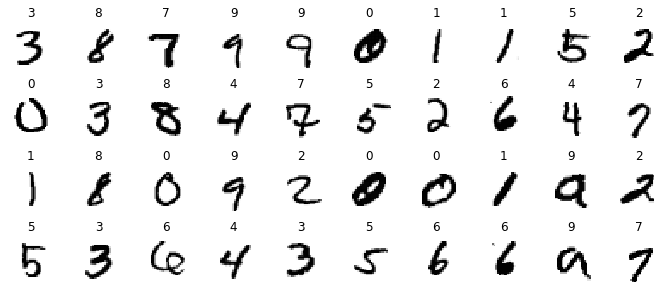

In [67]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.1, hspace=0.5)
plt.show()

In [72]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(500, activation="relu"))
model.add((keras.layers.Dropout(0.4)))
model.add(keras.layers.Dense(200, activation="relu"))
model.add(keras.layers.Dense(40, activation="softmax"))

In [73]:
keras.backend.clear_session()
np.random.seed(42)

In [74]:
model.layers

In [75]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 500)               392500    
_________________________________________________________________
dropout (Dropout)            (None, 500)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               100200    
_________________________________________________________________
dense_2 (Dense)              (None, 40)                8040      
Total params: 500,740
Trainable params: 500,740
Non-trainable params: 0
_________________________________________________________________


In [77]:
hidden1 = model.layers[4]
hidden1.name

'dense_2'

In [78]:
model.get_layer(hidden1.name) is hidden1

True

In [79]:
weights, biases = hidden1.get_weights()

In [80]:
weights

array([[ 0.09693991, -0.06292145,  0.07862455, ...,  0.00568615,
         0.02121022,  0.093978  ],
       [-0.12401906, -0.03201382,  0.13339831, ...,  0.02972461,
        -0.00427793, -0.01753266],
       [ 0.09534843, -0.03866501, -0.0147036 , ...,  0.11032529,
        -0.03041586,  0.07767688],
       ...,
       [-0.05782624,  0.10833614,  0.10679121, ...,  0.14541744,
         0.0993679 , -0.11990549],
       [-0.00051279, -0.08734318, -0.07122401, ..., -0.05252273,
        -0.0214576 ,  0.10093255],
       [-0.07370736,  0.01001368, -0.14460665, ..., -0.15692756,
        -0.10844209, -0.06040063]], dtype=float32)

In [81]:
weights.shape

(200, 40)

In [82]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0.], dtype=float32)

In [83]:
biases.shape

(40,)

In [84]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [ ]:
historyf = model.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 34s 690us/sample - loss: 0.7700 - accuracy: 0.7834 - val_loss: 0.3482 - val_accuracy: 0.9023
Epoch 2/30
50000/50000 [==============================] - 32s 645us/sample - loss: 0.3632 - accuracy: 0.8937 - val_loss: 0.2720 - val_accuracy: 0.9217
Epoch 3/30
50000/50000 [==============================] - 31s 629us/sample - loss: 0.2938 - accuracy: 0.9137 - val_loss: 0.2293 - val_accuracy: 0.9337
Epoch 4/30
50000/50000 [==============================] - 30s 604us/sample - loss: 0.2508 - accuracy: 0.9277 - val_loss: 0.1977 - val_accuracy: 0.9424
Epoch 5/30
50000/50000 [==============================] - 32s 645us/sample - loss: 0.2226 - accuracy: 0.9352 - val_loss: 0.1780 - val_accuracy: 0.9474
Epoch 6/30
50000/50000 [==============================] - 35s 705us/sample - loss: 0.1971 - accuracy: 0.9428 - val_loss: 0.1603 - val_accuracy: 0.9531ss: 0.1972 - accuracy: 0.94
Epoch 7/30
50000/

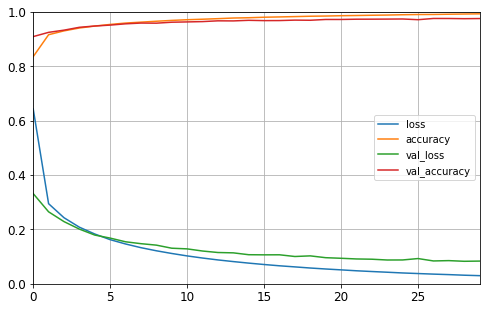

In [112]:
pd.DataFrame(historyf.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()